In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')


In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## STEP : 1 DATA CLEANING

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [13]:
df.sample(8)


,v1,v2
5418,ham,So how are you really. What are you up to. How...
433,ham,Booked ticket for pongal?
2825,ham,Ok lor...
1886,spam,Dear 0776xxxxxxx U've been invited to XCHAT. T...
4214,ham,No dear i was sleeping :-P
979,ham,Another month. I need chocolate weed and alcohol.
3485,ham,"Yeah, probably earlier than that"
3460,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...


In [14]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'email'},inplace=True)
df.sample(2)

,target,email
5258,ham,1 in cbe. 2 in chennai.
1651,ham,I wan but too early lei... Me outside now wun ...


In [15]:
#encoding output coluns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['output'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,email,output
5371,ham,"Lol, oh you got a friend for the dog ?",0
4150,ham,ÌÏ comin to fetch us oredi...,0
1304,ham,Your right! I'll make the appointment right now.,0
2582,spam,3 FREE TAROT TEXTS! Find out about your love l...,1
3744,ham,"Aight, let me know when you're gonna be around...",0


In [16]:
#checking missing values
df.isnull().sum()

target    0
email     0
output    0
dtype: int64

In [17]:
#check for duplication
df.duplicated().sum()

403

In [18]:
#removing duplicates
df = df.drop_duplicates(keep='first')

## 2 Exploratory Data Analysis (EDA)

In [19]:
df.head()

,target,email,output
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [20]:
df['output'].value_counts()

output
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2028f526720>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

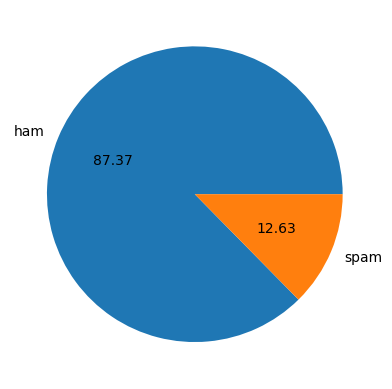

In [21]:
plt.pie(df['output'].value_counts(),labels=['ham','spam'],autopct="%.2f")

In [22]:
# Data is imbalanced

In [23]:
import nltk

In [24]:
import nltk
nltk.download('punkt', download_dir='data')
nltk.download('stopwords', download_dir='data')

[nltk_data] Downloading package punkt to data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
df['num_char'] = df['email'].apply(len)

In [26]:
df.head()

,target,email,output,num_char
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [27]:
#number of words
df['num_words'] = df['email'].apply(lambda x: len(nltk.wordpunct_tokenize(x)))

In [28]:
df.head()

,target,email,output,num_char,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24
1,ham,Ok lar... Joking wif u oni...,0,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,39
3,ham,U dun say so early hor... U c already then say...,0,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,16


In [29]:
df['num_sentences'] = df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,email,output,num_char,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,39,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,16,1


In [30]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,19.202747,1.965564
std,58.236293,13.963696,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,28.000000,2.000000
max,910.000000,210.000000,38.000000


In [31]:
 #ham
df[df['output'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.448627,1.820195
std,56.358207,13.769106,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,210.000000,38.000000


In [32]:
 #Spam
df[df['output'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,31.333844,2.970904
std,30.137753,7.997049,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,28.000000,2.000000
50%,149.000000,33.000000,3.000000
75%,157.000000,36.000000,4.000000
max,224.000000,49.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

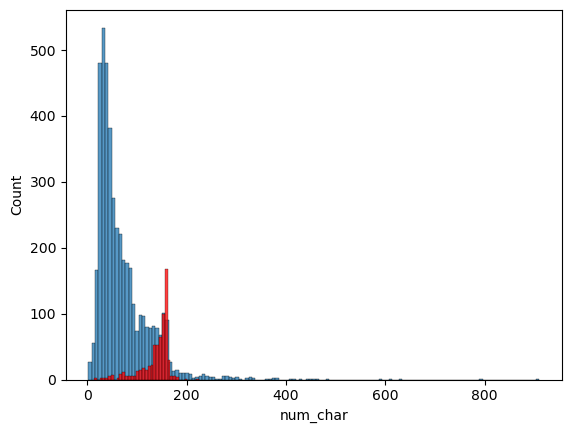

In [105]:
import seaborn as sns
sns.histplot(df[df['output'] == 0]['num_char'])
sns.histplot(df[df['output'] == 1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

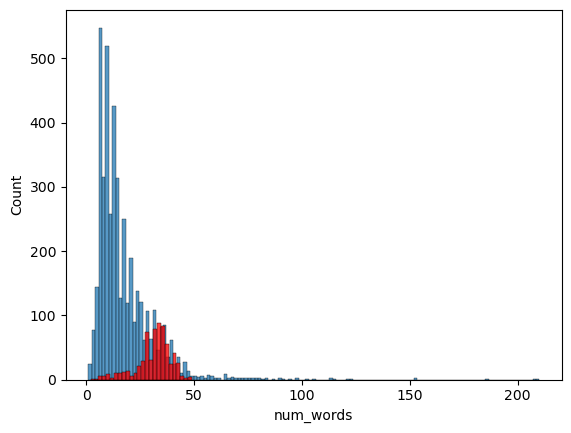

In [106]:
sns.histplot(df[df['output'] == 0]['num_words'])
sns.histplot(df[df['output'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

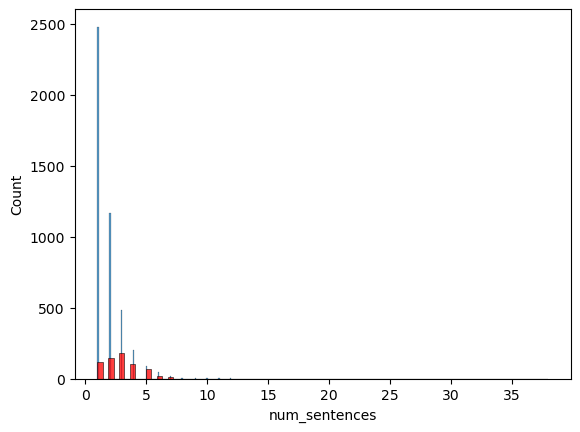

In [107]:
sns.histplot(df[df['output'] == 0]['num_sentences'])
sns.histplot(df[df['output'] == 1]['num_sentences'],color='red')

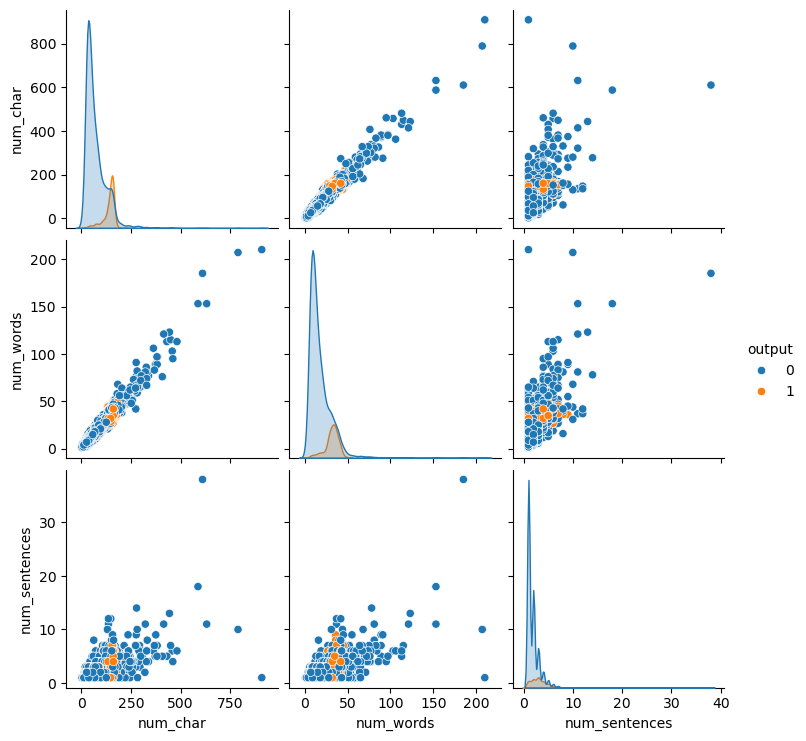

In [108]:
sns.pairplot(df,hue='output')

In [109]:
df.corr(numeric_only=True)

,output,num_char,num_words,num_sentences
output,1.000000,0.384717,0.330386,0.263939
num_char,0.384717,1.000000,0.976403,0.624139
num_words,0.330386,0.976403,1.000000,0.662786
num_sentences,0.263939,0.624139,0.662786,1.000000


<Axes: >

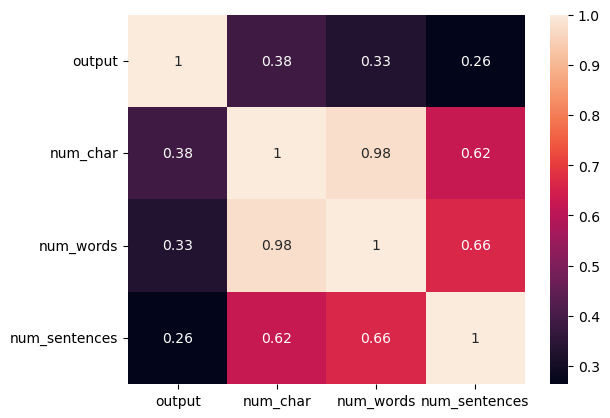

In [110]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# 3. Data Preprocessing
Lower case
Tokenization
Removing Special Characters
Removing stop words and punctutation
Stemming

In [111]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
    

In [112]:
transform_text(df['email'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [113]:
df['transformed_text'] = df['email'].apply(transform_text)

In [114]:
df.head()

,target,email,output,num_char,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,16,1,nah think goe usf live around though


In [115]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [116]:
spam_wc = wc.generate(df[df['output'] == 1]['transformed_text'].str.cat(sep=" "))

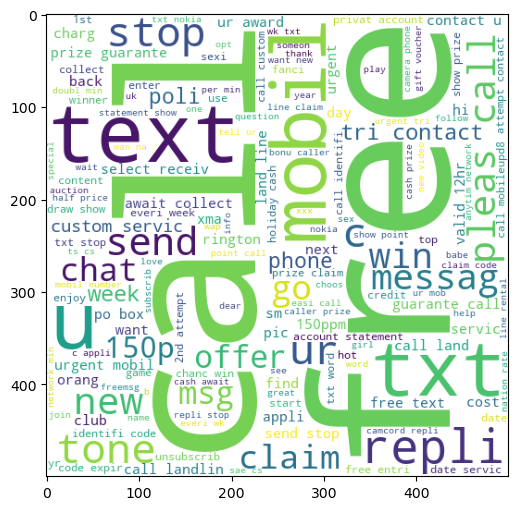

In [117]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [118]:
ham_wc = wc.generate(df[df['output'] == 0]['transformed_text'].str.cat(sep=" "))

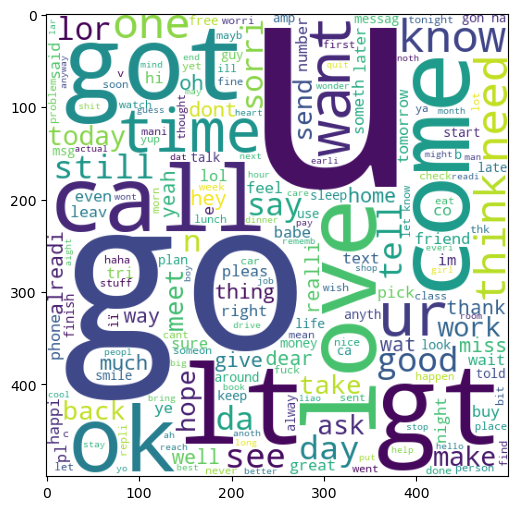

In [119]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [120]:
df.head()

,target,email,output,num_char,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,16,1,nah think goe usf live around though


In [121]:
spam_corpus = []
for msg in df[df['output'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [122]:
len(spam_corpus)

9939

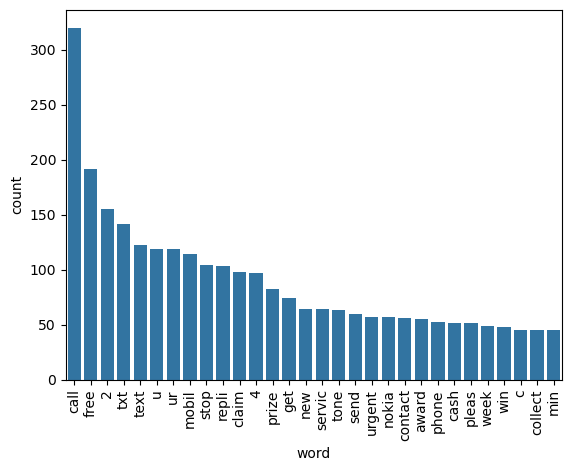

In [124]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 30 most common words
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot using seaborn with correct keyword arguments
sns.barplot(x='word', y='count', data=word_counts)
plt.xticks(rotation='vertical')
plt.show()


In [125]:
ham_corpus = []
for msg in df[df['output'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [126]:
len(ham_corpus)

35404

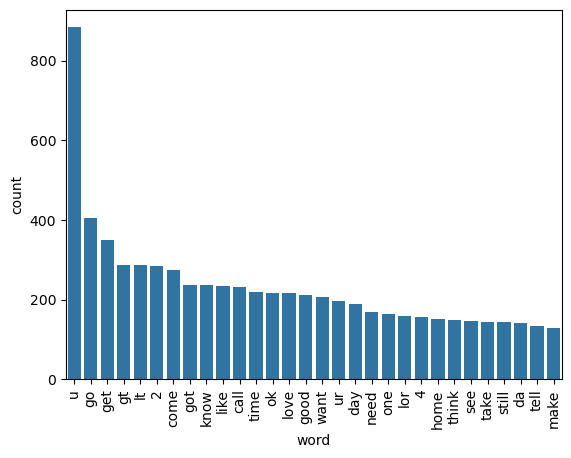

In [128]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 30 most common words in ham_corpus
ham_word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x='word', y='count', data=ham_word_counts)
plt.xticks(rotation='vertical')
plt.show()


## 4. Model Building

In [170]:
# using countvectorizer

In [129]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [142]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [143]:
X.shape

(5169, 6708)

In [144]:
y = df['output'].values

In [145]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [146]:
from sklearn.model_selection import train_test_split 

In [158]:
X_train , X_test,y_train , y_test = train_test_split(X,y,test_size=0.2,
    random_state=2)

In [159]:
y_train.shape

(4135,)

In [160]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [167]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [168]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [169]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [171]:
# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [172]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [173]:
X.shape

(5169, 6708)

In [174]:
y = df['output'].values

In [175]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train,y_text = train_test_split(X,y,test_size=0.2,random_state=2)

In [178]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [179]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [180]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [181]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [182]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))